## Многослойный перцептрон

<img src="https://upload.wikimedia.org/wikipedia/ru/thumb/d/de/Neuro.PNG/800px-Neuro.PNG">

$$y=h(\sum_{i=1}^k w_ix_i+w_0)$$
Уже двуслойная сеть может апркосимировать любую функцию

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

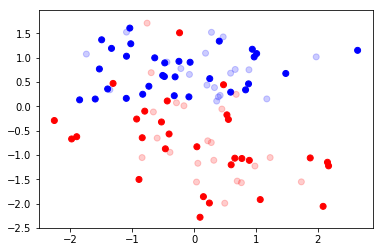

In [3]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)

In [4]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

C:\Users\sanek\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.875

In [5]:
h = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

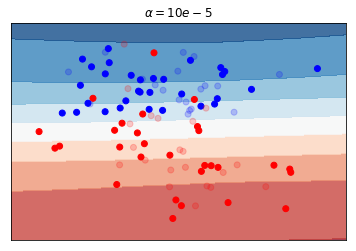

In [6]:
Zh = Z[:,1].reshape(xx.shape)
plt.contourf(xx, yy, Zh, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('$\\alpha=10e-5$')

In [7]:
from sklearn.datasets import make_moons, make_circles

datas1 = make_moons(noise=0.3, random_state=0),
datas2 = make_circles(noise=0.2, factor=0.5, random_state=1)

In [64]:
# Повторить на этих датасетах с изменением количества параметров сети